# Mitsiu Alejandro Carreño Sarabia - E23S-18014

## Evaluación parte 1:
Tras leer el artículo "Modeling and clustering water demand patterns from real-world smart meter data," describe brevemente la aplicación que los investigadores están dando a la transformada de Fourier y proporciona 3 ventajas que esta estrategia concede. 

La investigación esta enfocada en eficientar la distribución del agua dentro de las ciudades, ello, posible gracias a la implementación de redes de abastecimiento inteligentes, las cuales permiten hacer mediciones con mayor frequencia que una red de abastecimiento tradicional.
Con los datos de consumo de agua, se aplica la transformada de Fourier para extraer patrones de temporada sobre el consumo, posteriormente se aplican modelos de agrupamiento (k-means y Fourier Regresion Mixture).

Ventajas:
* El poder predecir la cantidad de agua que requiere cierta población, permite estimar si las reservas de agua serán suficientes o si será necesario transportar más agua desde otras locaciones.
* El entender las cantidades de consumo de agua normales, puede permitir detectar anomalías en el sistema como rotura de tuberías, tuberías tapadas, etc
* El entender y clasificar los consumos en clusters (uso comercial, uso industrial, uso residencial) fácilita la creación de politicas para su regulación, por ejemplo reducir/aumentar impuestos de agua a cierto sector para impulsar o desacelerar su crecimiento.

## Evaluación parte 2:
<h1>Using Fourier transform for time series decomposition <span class="tocSkip"></span></h1>

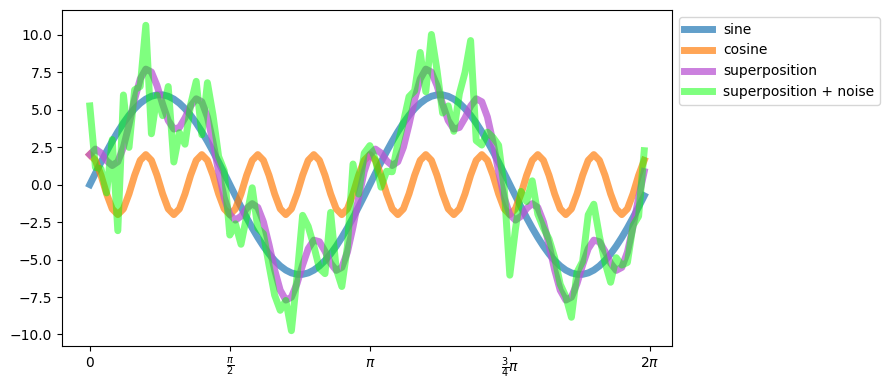

In [1]:
# Create some dummy data:
import numpy as np
import matplotlib.pyplot as plt 
       # imports most relevant Matplotlib commands

# define frequencies, amplitudes, and sampling rate and time array:
f1 =  2  # Frequency 1 in Hz
f2 = 10  # Frequency 2 in Hz
A1 = 6   # Amplitude 1
A2 = 2   # Amplitude 2
Fs = 100 # Sampling rate
t  = np.arange(0,1,1/Fs)

# calculate prime signals:
A_sin = A1 * np.sin(2 * np.pi * f1 * t)
A_cos = A2 * np.cos(2 * np.pi * f2 * t)
A_signal = A_sin + A_cos

# add some noise:
np.random.seed(1)
A_Noise = 2
Noise = np.random.randn(len(t)) * A_Noise
A_signal_noisy = A_signal + Noise

# plots:
fig=plt.figure(3, figsize=(9,4))
plt.clf()
plt.plot(t, A_sin, label="sine", lw=5, alpha=0.7)
plt.plot(t, A_cos, label="cosine", lw=5, alpha=0.7)
plt.plot(t, A_signal, lw=5, c="mediumorchid", 
         label="superposition", alpha=0.75)
plt.plot(t, A_signal_noisy, lw=5, c="lime", 
         label="superposition + noise", alpha=0.5)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.xticks([0, 0.25, 0.5, 0.75, 1], 
           ["0", r"$\frac{\pi}{2}$", r"$\pi$", 
            r"$\frac{3}{4}\pi$", r"$2\pi$"])
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Note</b>: The expressions within the `xtick` command of the above plot are $\LaTeX$ commands. You can find further information about the usage of $\LaTeX$ in <i>Markdown</i> documents and, hence, also in <i>Jupyter</i> notebooks <a href="https://www.fabriziomusacchio.com/teaching/Markdown_Guide/#latex-commands">here</a>. An overview of the most common $\LaTeX$ commands can be found in this <a href="https://www.fabriziomusacchio.com/teaching/LaTeX_Guide/">guide</a>.
</div>

We again see, that our signal is a superposition of a sine and cosine wave (`A_signal`) plus some random noise (`A_signal_noisy`). Now, we make use of Fourier Transform in order to deconstruct the signal.

## Fourier Analysis
[**Fourier analysis**](https://en.wikipedia.org/wiki/Fourier_analysis), also know as harmonic analysis, is the mathematical field of _Fourier series_ and _Fourier integrals_. A [**Fourier series**](https://en.wikipedia.org/wiki/Fourier_series#Definition) decomposes any periodic function (or signal) into the (possibly) infinite sum of a set of simple sine and cosine functions or, equivalently, complex exponentials. The [**Fourier transform**](https://en.wikipedia.org/wiki/Fourier_transform) is a tool for decomposing functions depending on _space_ or _time_ into functions depending on their component _spatial_ or _temporal frequency_.





## Fourier Transform in _Python_
For _Python_, where are several Fast Fourier Transform implementations availble. Here, we will use the `fft` function from the `scipy.fft` package: 

Text(0.5, 1.0, '$|\\mathcal{F}(A_{signal})|$')

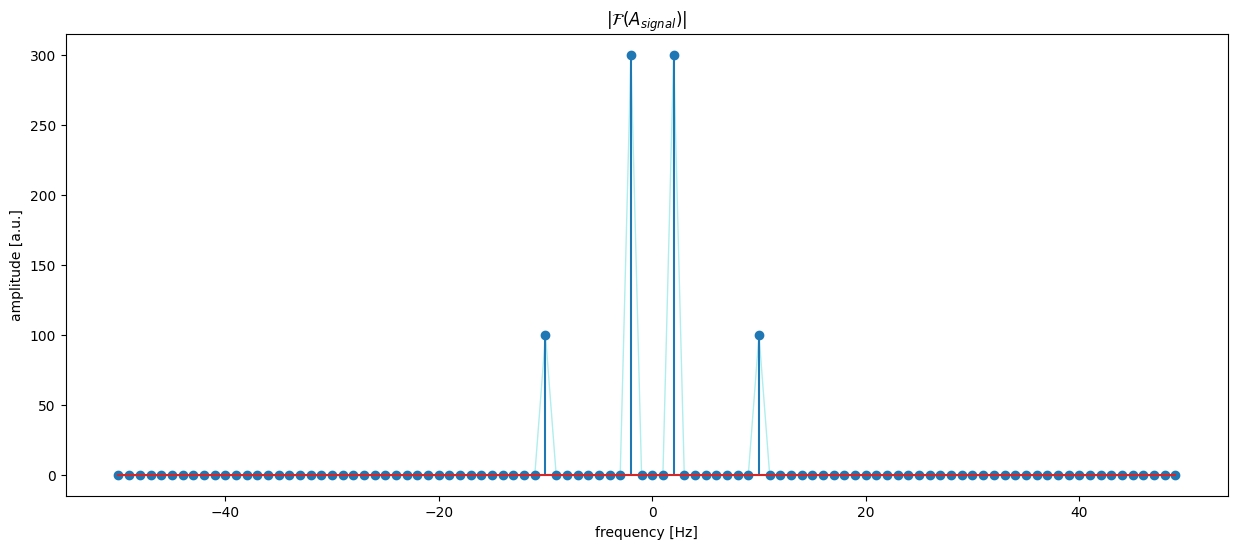

In [2]:
import scipy.fft
A_signal_fft = scipy.fft.fft(A_signal)
frequencies = scipy.fft.fftfreq(np.size(t), 1/Fs)

fig=plt.figure(2, figsize=(15,6))
plt.clf()
plt.plot(frequencies, np.abs(A_signal_fft), lw=1.0, c='paleturquoise')
plt.stem(frequencies, np.abs(A_signal_fft))
plt.xlabel("frequency [Hz]")
plt.ylabel("amplitude [a.u.]")
plt.title(r"$|\mathcal{F}(A_{signal})|$")

Text(0.5, 1.0, '$|\\mathcal{F}(A_{signal})|$')

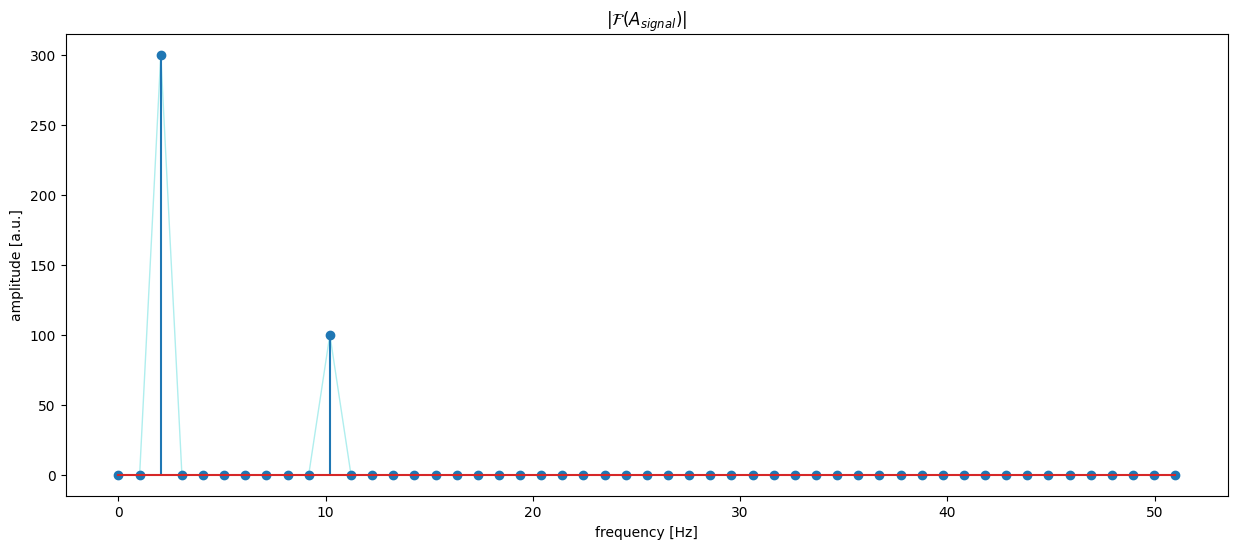

In [3]:
frequency_eval_max = 100
A_signal_rfft = scipy.fft.rfft(A_signal, n=frequency_eval_max)
n = np.shape(A_signal_rfft)[0] # np.size(t)
frequencies_rel = n*Fs/frequency_eval_max * np.linspace(0,1,int(n))

fig=plt.figure(3, figsize=(15,6))
plt.clf()
plt.plot(frequencies_rel, np.abs(A_signal_rfft), lw=1.0, c='paleturquoise')
plt.stem(frequencies_rel, np.abs(A_signal_rfft))
plt.xlabel("frequency [Hz]")
plt.ylabel("amplitude [a.u.]")
plt.title(r"$|\mathcal{F}(A_{signal})|$")

The Fourier transformed signal $|\mathcal{F}(A_{signal})|$ can also be transformed back to the spatial domain, $|\mathcal{F}^{-1}(A_{signal})|$, by applying the fast inverse Fourier transform function `irfft`:

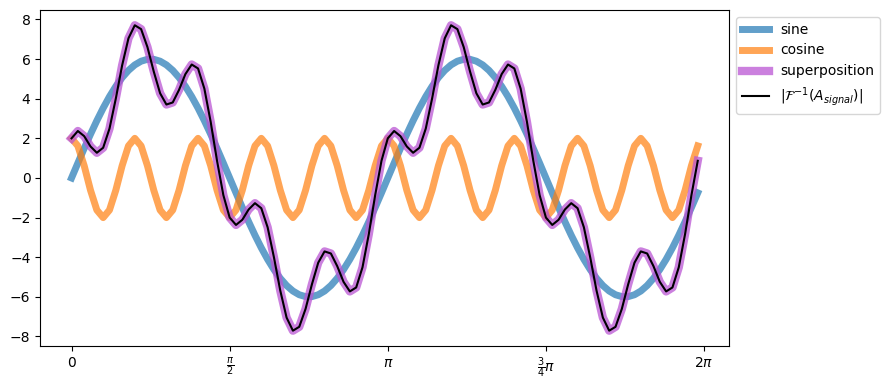

In [4]:
A_signal_irfft = scipy.fft.irfft(A_signal_rfft)

fig=plt.figure(4, figsize=(9,4))
plt.clf()
plt.plot(t, A_sin, label="sine", lw=5, alpha=0.7)
plt.plot(t, A_cos, label="cosine", lw=5, alpha=0.7)
plt.plot(t, A_signal, lw=6, c="mediumorchid", 
         label="superposition", alpha=0.75)
plt.plot(t, A_signal_irfft,  c='k',
         label="$|\mathcal{F}^{-1}(A_{signal})|$")
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.xticks([0, 0.25, 0.5, 0.75, 1], 
           ["0", r"$\frac{\pi}{2}$", r"$\pi$", 
            r"$\frac{3}{4}\pi$", r"$2\pi$"])
plt.tight_layout()
plt.show()

### Exercise 1
1. Apply and plot the Fast Fourier Transform to the noisy signal `A_signal_noisy`.
2. What do you notice?

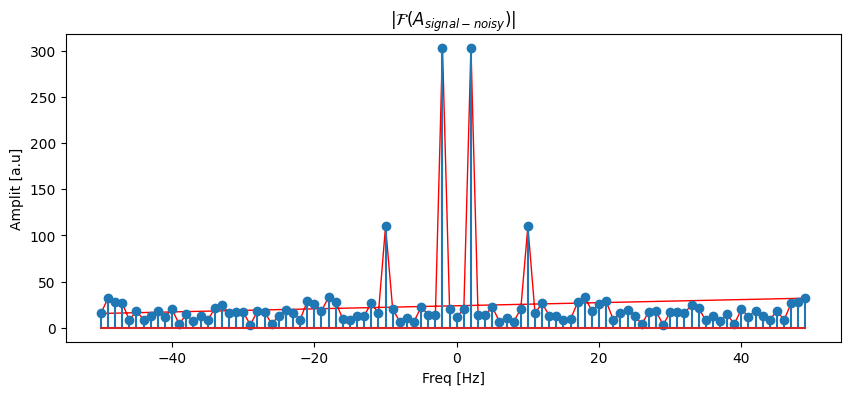

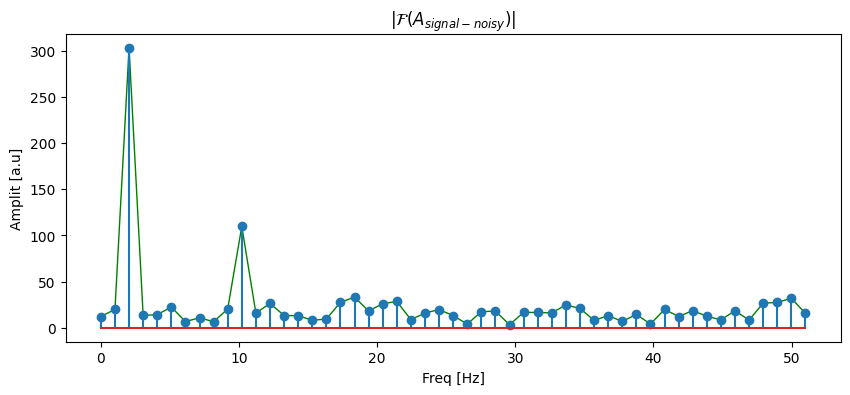

Podemos observar que el ruido también aparece dentro de nuestro dominio de frecuencias


In [5]:
# You solution 1 here:
_1_A_sig_noisy_fft = scipy.fft.fft(A_signal_noisy)
_1_freq_noisy = scipy.fft.fftfreq(np.size(t), 1/Fs)

_1_fig_noisy = plt.figure(5, figsize=(10,4))
plt.clf()
plt.plot(_1_freq_noisy, np.abs(_1_A_sig_noisy_fft), lw=1.0, c="red")
plt.stem(_1_freq_noisy, np.abs(_1_A_sig_noisy_fft))
plt.xlabel("Freq [Hz]")
plt.ylabel("Amplit [a.u]")
plt.title(r"$|\mathcal{F}(A_{signal-noisy})|$")
plt.show()

frequency_eval_max = 100
_1_A_signal_noisy_rfft = scipy.fft.rfft(A_signal_noisy, n=frequency_eval_max)
_1_n = np.shape(_1_A_signal_noisy_rfft)[0]  # np.size(t)
_1_freq_rel_noisy = _1_n*Fs/frequency_eval_max * np.linspace(0,1,int(_1_n))

_1_fig_noisy_half = plt.figure(6, figsize=(10,4))
plt.plot(_1_freq_rel_noisy, np.abs(_1_A_signal_noisy_rfft), lw=1.0, c="green")
plt.stem(_1_freq_rel_noisy, np.abs(_1_A_signal_noisy_rfft))
plt.xlabel("Freq [Hz]")
plt.ylabel("Amplit [a.u]")
plt.title(r"$|\mathcal{F}(A_{signal-noisy})|$")
plt.show()


print("Podemos observar que el ruido también aparece dentro de nuestro dominio de frecuencias")

## Exercise 2: Frequency filtering by using Fourier Transform frequencies
1. Use the function `find_closest_within_array` defined below to find the index `idx` of the value within the `frequencies_rel` array, that is closest to the frequency of 10 Hz.
2. Use the output index `idx` to set the corresponding amplutide of the Fourier transformed signal `A_signal_rfft` to zero. Then, retransform the Fourier signal and plot the filtered signal.
3. Reapply your script for a filter frequency of 2 Hz.
4. Reapply your script for the noisy signal.

In [6]:
def find_closest_within_array(array, value):
    """ Finds closest value within an array.
    
        array: input NumPy array (can also be a list)
        value: value to search for
        
        array[idx]: found closest value within array
        idx:        index of the found closest value 
        
    """
    numpy_array = np.asarray(array) 
    idx = (np.abs(numpy_array-value)).argmin()
    return array[idx], idx

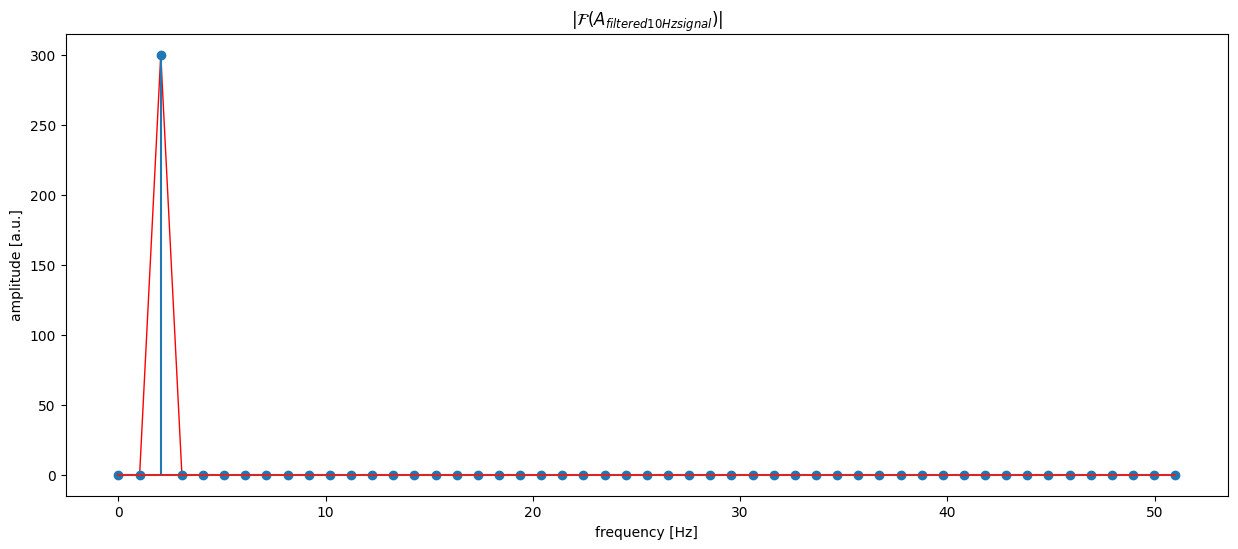

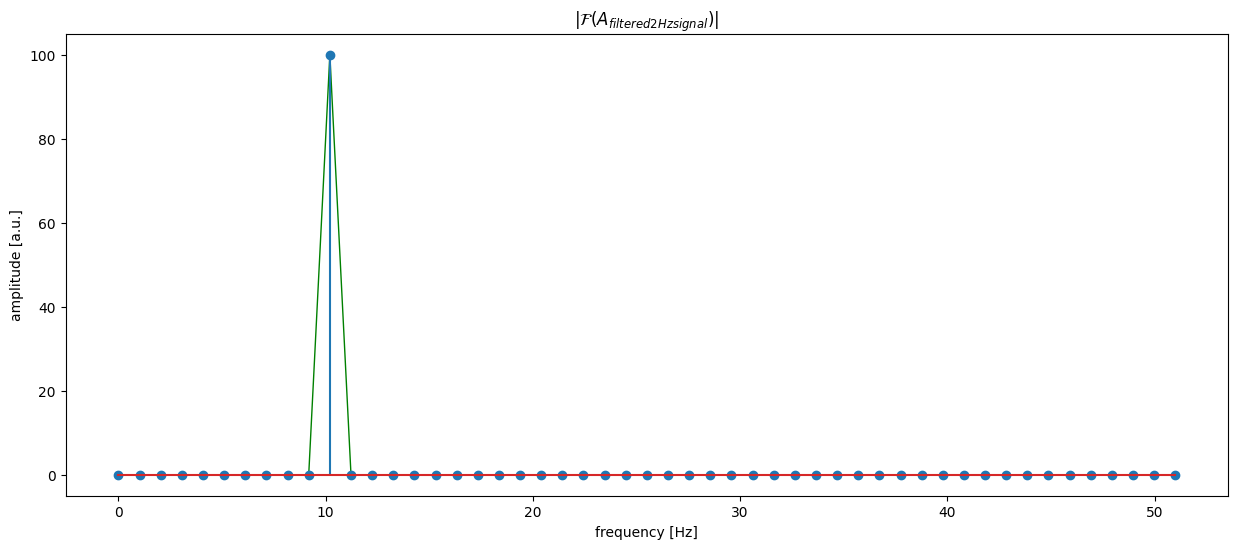

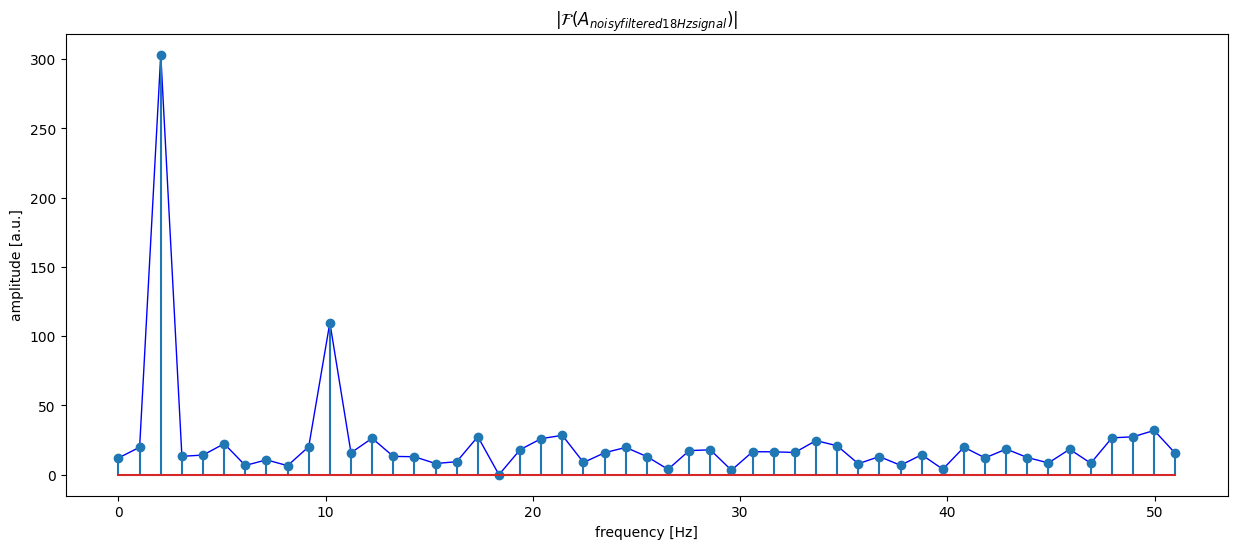

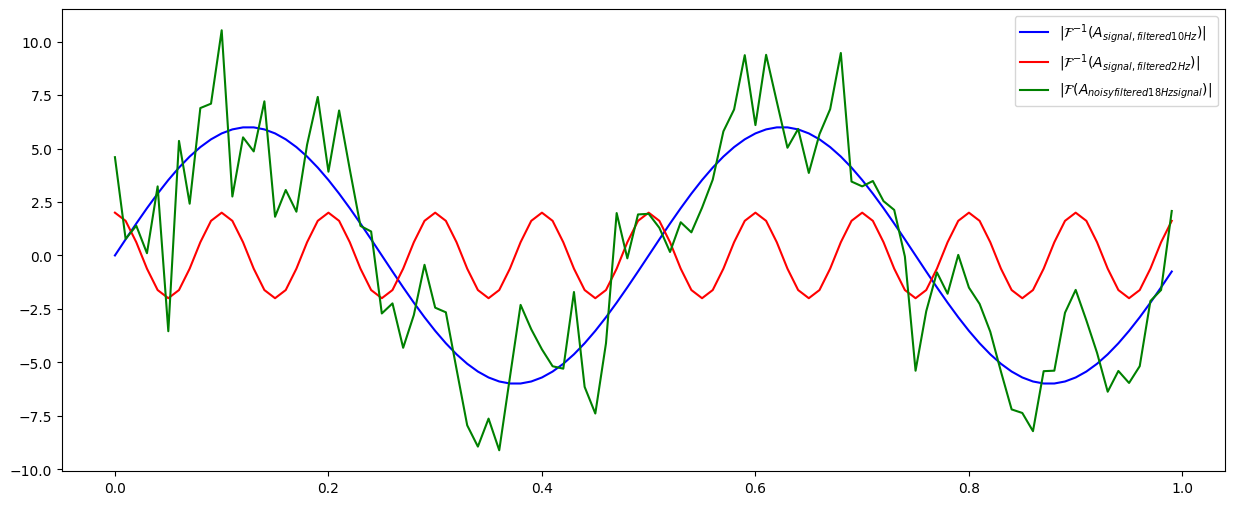

In [7]:
# Your solution 2 here:

## Filtrar frequencia de 10 Hz
frequency_eval_max = 100
_2_A_signal_rfft = A_signal_rfft.copy()
n = np.shape(_2_A_signal_rfft)[0]

_2_freq_rel = n*Fs/frequency_eval_max * np.linspace(0,1,int(n))



_2_arr_val_10h, _2_idx_10h = find_closest_within_array(_2_freq_rel, 10)
_2_A_signal_rfft[_2_idx_10h] = 0


_2_A_signal_filtered_1 = scipy.fft.irfft(_2_A_signal_rfft)

fig=plt.figure(8, figsize=(15,6))
plt.clf()
plt.plot(_2_freq_rel, np.abs(_2_A_signal_rfft), lw=1.0, c='red')
plt.stem(_2_freq_rel, np.abs(_2_A_signal_rfft))
plt.xlabel("frequency [Hz]")
plt.ylabel("amplitude [a.u.]")
plt.title(r"$|\mathcal{F}(A_{filtered 10 Hz signal})|$")
plt.show()

## Filtrar frequencia de 2 Hz
_2_arr_val_2h, _2_idx_2h = find_closest_within_array(frequencies_rel, 2)

_2_A_signal_rfft = A_signal_rfft.copy()
_2_A_signal_rfft[_2_idx_2h] = 0

_2_A_signal_filtered_2 = scipy.fft.irfft(_2_A_signal_rfft)

fig=plt.figure(9, figsize=(15,6))
plt.clf()
plt.plot(_2_freq_rel, np.abs(_2_A_signal_rfft), lw=1.0, c='green')
plt.stem(_2_freq_rel, np.abs(_2_A_signal_rfft))
plt.xlabel("frequency [Hz]")
plt.ylabel("amplitude [a.u.]")
plt.title(r"$|\mathcal{F}(A_{filtered 2 Hz signal})|$")
plt.show()


## Filtrar noisy
_2_arr_val_noisy, _2_idx_18h = find_closest_within_array(frequencies_rel, 18)

_2_A_signal_noisy_rfft = _1_A_signal_noisy_rfft.copy()
_2_A_signal_noisy_rfft[_2_idx_18h] = 0;

_2_A_signal_noisy_filtered = scipy.fft.irfft(_2_A_signal_noisy_rfft)

fig = plt.figure(10, figsize=(15,6))
plt.clf()
plt.plot(_2_freq_rel, np.abs(_2_A_signal_noisy_rfft), lw=1.0, c="blue")
plt.stem(_2_freq_rel, np.abs(_2_A_signal_noisy_rfft))
plt.xlabel("frequency [Hz]")
plt.ylabel("amplitude [a.u.]")
plt.title(r"$|\mathcal{F}(A_{noisy filtered 18 Hz signal})|$")
plt.show()


fig = plt.figure(10, figsize=(15,6))
plt.clf()
plt.plot(t, _2_A_signal_filtered_1, c="b", label="$|\mathcal{F}^{-1}(A_{signal, filtered  10Hz})|$")
plt.plot(t, _2_A_signal_filtered_2, c="r", label="$|\mathcal{F}^{-1}(A_{signal, filtered  2Hz})|$")
plt.plot(t, _2_A_signal_noisy_filtered, c="green", label="$|\mathcal{F}(A_{noisy filtered 18 Hz signal})|$")
plt.legend()



## Exercise 3: Frequency filtering by using Fourier Transform amplitudes
With the filter approach shown above we are able to specifically filter for a certain frequency. However, to filter, e.g., random noise that is present in almost every frequency (with low amplitudes though), this approach will not work. For such cases we need an alternative approach, that filters for amplitudes within the Fourier transformed signal instead for the corresponding frequency:

1. Define a threshold `A_pass_limit = 50`, that sets the lower bound of the amplitudes we want to keep within the Fourier transform $|\mathcal{F}(A_{signal})|$ of our noisy signal (`A_signal_rfft`). Filter `A_signal_rfft` by setting all of its values, that are lower than `A_pass_limit`, to zero. 
2. Retransform the Fourier signal and plot the resulting filtered signal.

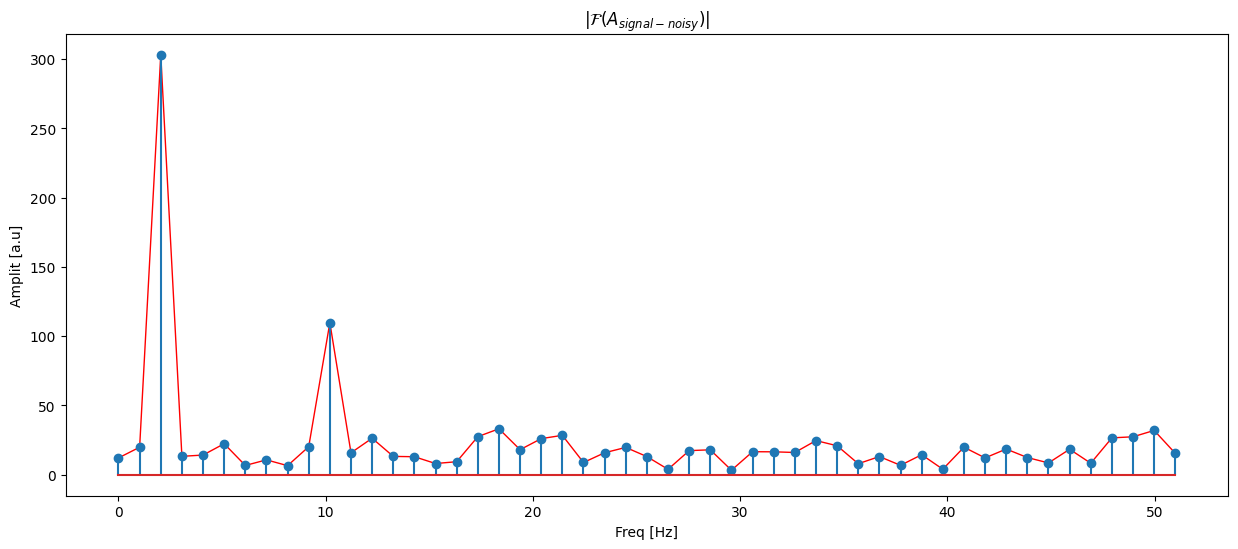

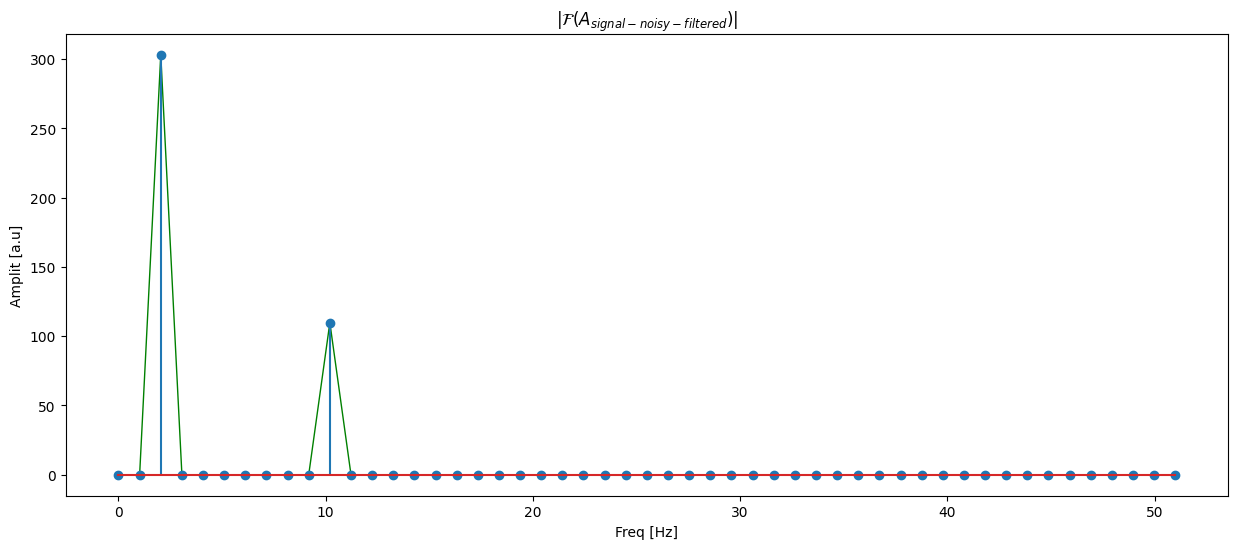

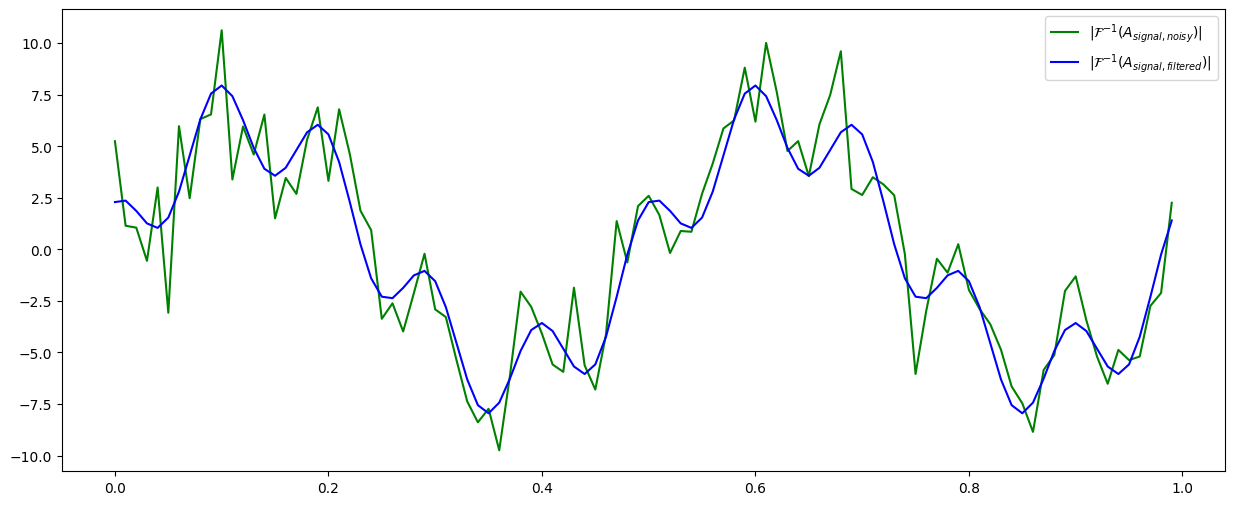

In [8]:
# Your solution 3 here:

#_3_A_signal_noisy_fft = scipy.fft.fft(A_signal_noisy)
#_3_freq_noisy = scipy.fft.fftfreq(np.size(t), 1/Fs)


frequency_eval_max = 100
_3_A_signal_noisy_rfft = scipy.fft.rfft(A_signal_noisy, n=frequency_eval_max)
n = np.shape(_3_A_signal_noisy_rfft)[0]  # np.size(t)
_3_freq_rel_noisy = n*Fs/frequency_eval_max * np.linspace(0,1,int(n))

fig = plt.figure(11, figsize=(15,6))
plt.plot(_3_freq_rel_noisy, np.abs(_3_A_signal_noisy_rfft), lw=1.0, c="red")
plt.stem(_3_freq_rel_noisy, np.abs(_3_A_signal_noisy_rfft))
plt.xlabel("Freq [Hz]")
plt.ylabel("Amplit [a.u]")
plt.title(r"$|\mathcal{F}(A_{signal-noisy})|$")
plt.show()

_3_A_signal_noisy_filtered_rfft = _3_A_signal_noisy_rfft.copy()

_3_A_pass_limit = 50 # lower bound of the amplitudes to keep
for i in range(len(_3_A_signal_noisy_filtered_rfft)):
  if(np.abs(_3_A_signal_noisy_filtered_rfft[i]) < _3_A_pass_limit):
    _3_A_signal_noisy_filtered_rfft[i] = 0

fig = plt.figure(12, figsize=(15,6))
plt.plot(_3_freq_rel_noisy, np.abs(_3_A_signal_noisy_filtered_rfft), lw=1.0, c="green")
plt.stem(_3_freq_rel_noisy, np.abs(_3_A_signal_noisy_filtered_rfft))
plt.xlabel("Freq [Hz]")
plt.ylabel("Amplit [a.u]")
plt.title(r"$|\mathcal{F}(A_{signal-noisy-filtered})|$")
plt.show()


_3_A_signal_noisy = scipy.fft.irfft(_3_A_signal_noisy_rfft)
_3_A_signal_noisy_filtered = scipy.fft.irfft(_3_A_signal_noisy_filtered_rfft)


fig = plt.figure(13, figsize=(15,6))
plt.clf()
plt.plot(t, _3_A_signal_noisy, c="g", label="$|\mathcal{F}^{-1}(A_{signal, noisy})|$")
plt.plot(t, _3_A_signal_noisy_filtered, c="blue", label="$|\mathcal{F}^{-1}(A_{signal, filtered})|$")
plt.legend()


**Note**: '$|\mathcal{F}^{-1}(A_{signal, filtered})|$' is [$\LaTeX$](https://www.fabriziomusacchio.com/teaching/LaTeX_Guide/).

## Exercise 4: Finalize your pipeline

1. Put the filter solution from Exercise 2 into a function, e.g., called `frequency_filter`. Define the function in such a way, that it outputs the filtered signal, the Fourier transform of the signal, the filtered Fourier transform of the signal as well as the corresponding frequency array (`frequencies_rel`).
2. Apply your function to `A_signal` as well as to `A_signal_noisy`, both for a filter frequency of 10 and 2 Hz, respectively.
3. Repeat 1. and 2. for the solution from Exercise 3 (call the function, e.g., `amplitude_filter`).

**Hint**: It is advisable to also put your plot commands into a plot function in order to avoid code repetitions within your script.

In [9]:
# Your solution 4.1 and 4.2 here:

"""Hints:

def frequency_filter(signal, filter_frequency, 
                     frequency_eval_max):
    ...
    return (e.g.) signal_filtered, signal_rfft_filtered,  
                  signal_rfft, frequencies_rel


def plot_comparison(frequencies_rel, Current_signal_rfft, 
                    Current_signal, fignum=1):
    ...
    return NOTHING

"""

'Hints:\n\ndef frequency_filter(signal, filter_frequency, \n                     frequency_eval_max):\n    ...\n    return (e.g.) signal_filtered, signal_rfft_filtered,  \n                  signal_rfft, frequencies_rel\n\n\ndef plot_comparison(frequencies_rel, Current_signal_rfft, \n                    Current_signal, fignum=1):\n    ...\n    return NOTHING\n\n'

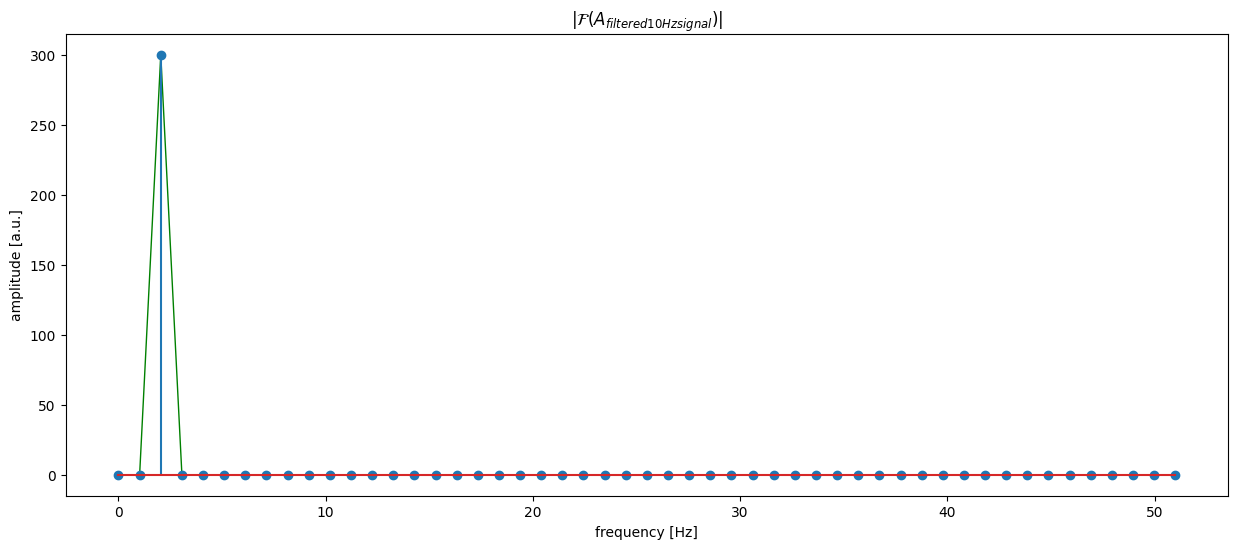

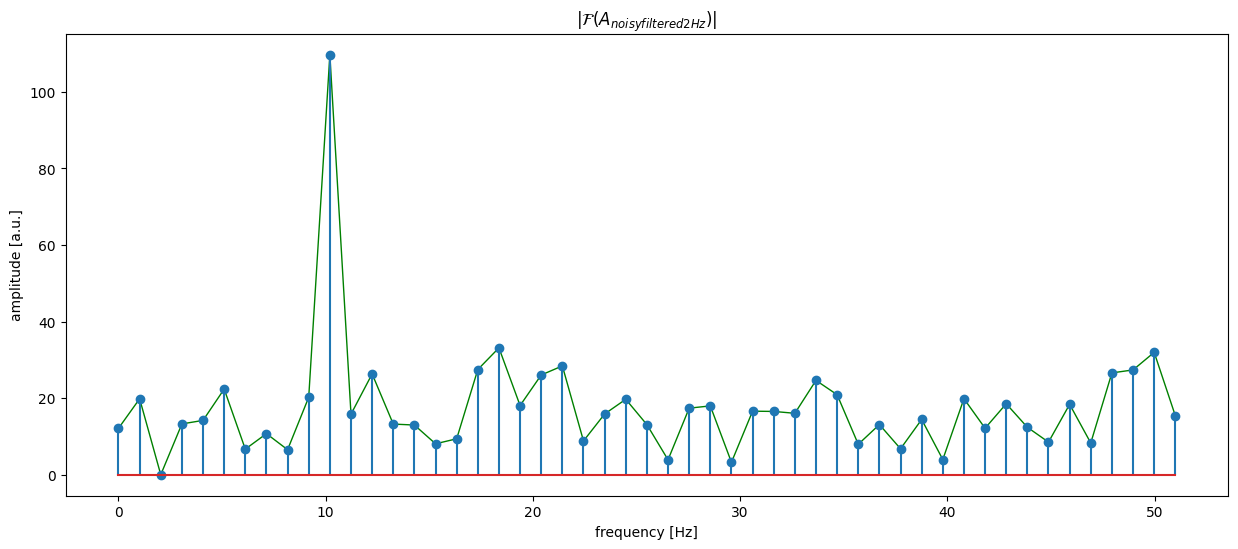

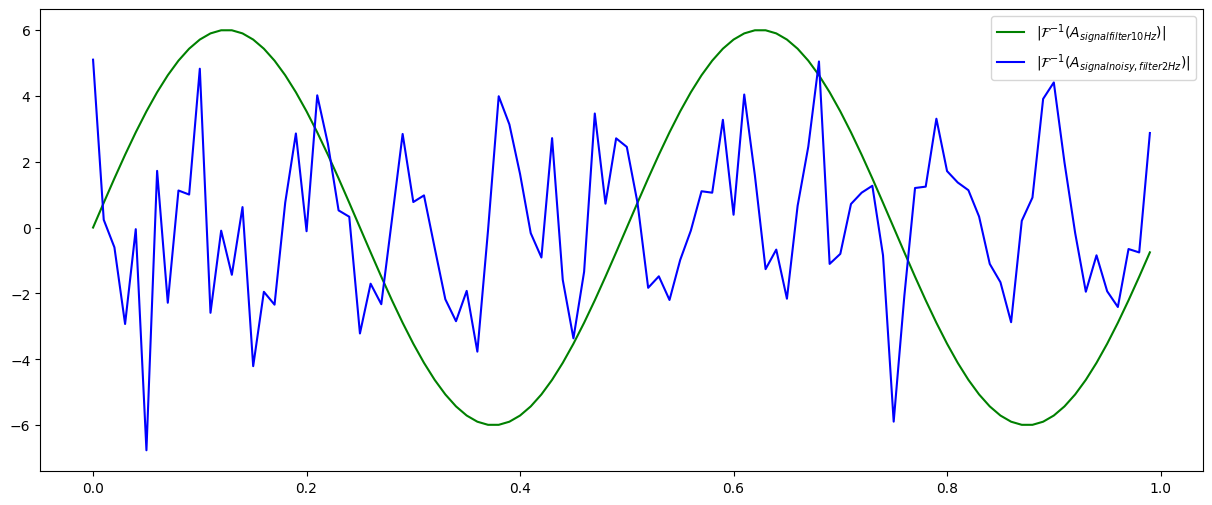

In [10]:
# Your solution 4.1 and 4.2 here:
def find_closest_within_array(array, value):
    """ Finds closest value within an array.
    
        array: input NumPy array (can also be a list)
        value: value to search for
        
        array[idx]: found closest value within array
        idx:        index of the found closest value 
        
    """
    numpy_array = np.asarray(array) 
    idx = (np.abs(numpy_array-value)).argmin()
    return array[idx], idx

def frequency_filter(signal, filter_frequency, frequency_eval_max):
  signal_rfft = scipy.fft.rfft(signal, n=frequency_eval_max)
  n = np.shape(signal_rfft)[0]

  freq_rel = n*Fs/frequency_eval_max * np.linspace(0,1,int(n))

  signal_filtered_rfft = signal_rfft.copy()
  
  val, idx = find_closest_within_array(freq_rel, filter_frequency)
  signal_filtered_rfft[idx] = 0

  signal_filtered = scipy.fft.irfft(signal_filtered_rfft)

  return signal_filtered, signal_filtered_rfft, signal_rfft, freq_rel


frequency_eval_max = 100

# A_signal filtering 10 Hz
# s = signal
# n = noisy
# f = filtered
_4_s_f, _4_s_f_rfft, _4_s_rfft, _4_freq_rel = frequency_filter(A_signal, 10, frequency_eval_max)

fig = plt.figure(14, figsize=(15,6))
plt.clf()
plt.plot(_4_freq_rel, np.abs(_4_s_f_rfft), lw=1.0, c="green")
plt.stem(_4_freq_rel, np.abs(_4_s_f_rfft))
plt.xlabel("frequency [Hz]")
plt.ylabel("amplitude [a.u.]")
plt.title(r"$|\mathcal{F}(A_{filtered 10 Hz signal})|$")
plt.show()

# A_signal_noisy filtering 2Hz
# s = signal
# n = noisy
# f = filtered
_4_s_n_f, _4_s_n_f_rfft, _4_s_n_rfft, _4_freq_n_rel = frequency_filter(A_signal_noisy, 2, frequency_eval_max)

fig = plt.figure(15, figsize=(15,6))
plt.clf()
plt.plot(_4_freq_n_rel, np.abs(_4_s_n_f_rfft), lw=1.0, c="green")
plt.stem(_4_freq_n_rel, np.abs(_4_s_n_f_rfft))
plt.xlabel("frequency [Hz]")
plt.ylabel("amplitude [a.u.]")
plt.title(r"$|\mathcal{F}(A_{noisy filtered 2 Hz})|$")
plt.show()


fig = plt.figure(16, figsize=(15,6))
plt.clf()
plt.plot(t, _4_s_f, c="g", label="$|\mathcal{F}^{-1}(A_{signal filter 10 Hz})|$")
plt.plot(t, _4_s_n_f, c="blue", label="$|\mathcal{F}^{-1}(A_{signal noisy, filter 2 Hz})|$")
plt.legend()

<details>
<summary><strong>Toggle solution</strong></summary>

~~~python
# Solution 4.1 and 4.2:
def frequency_filter(signal, filter_frequency, frequency_eval_max):
    signal_rfft = scipy.fft.rfft(signal, n=frequency_eval_max)
    n = np.shape(signal_rfft)[0]
    frequencies_rel = n * Fs / frequency_eval_max * np.linspace(0, 1, int(n))
    val, idx = find_closest_within_array(frequencies_rel, filter_frequency)

    signal_rfft_filtered = signal_rfft.copy()
    signal_rfft_filtered[idx] = 0
    signal_filtered = scipy.fft.irfft(signal_rfft_filtered)
    return signal_filtered, signal_rfft_filtered, signal_rfft, frequencies_rel

def plot_comparison(frequencies_rel, Current_signal_rfft, Current_signal,
                    A_sin, A_cos, A_signal, fignum=1):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, num=fignum, clear=True, figsize=(9, 8))
    ax1.stem(frequencies_rel, np.abs(Current_signal_rfft))
    ax1.set_title(r"$|\mathcal{F}(A_{signal})|$")
    ax1.set_xlabel("frequency [Hz]")
    ax1.set_ylabel("amplitude [a.u.]")

    ax2.plot(t, A_sin, label="sine", lw=5, alpha=0.7)
    ax2.plot(t, A_cos, label="cosine", lw=5, alpha=0.7)
    ax2.plot(t, Current_signal, lw=5, c="lime", label="superposition + noise", alpha=0.5)
    ax2.plot(t, A_signal, lw=5, c="mediumorchid", label="superposition", alpha=0.75)
    ax2.legend(loc='upper right', fontsize=8)
    plt.xticks([0, 0.25, 0.5, 0.75, 1], ["0", r"$\frac{\pi}{2}$",
                                         r"$\pi$", r"$\frac{3}{4}\pi$", r"$2\pi$"])
    ax2.set_title("Results")
    ax2.set_xlabel("x [rad]")

    ax3.stem(frequencies_rel, np.abs(Current_signal_rfft_filtered))
    ax3.set_title(r"$|\mathcal{F}(A_{signal, filtered})|$")
    ax3.set_xlabel("frequency [Hz]")
    ax3.set_ylabel("amplitude [a.u.]")

    ax4.plot(t, A_sin, label="sine", lw=5, alpha=0.7)
    ax4.plot(t, A_cos, label="cosine", lw=5, alpha=0.7)
    ax4.plot(t, Current_signal, lw=5, c="lime", label="superposition + noise", alpha=0.5)
    ax4.plot(t, A_signal, lw=5, c="mediumorchid", label="superposition", alpha=0.75)
    ax4.plot(t, Current_signal_filtered, c='k',
             label="$\mathcal{F}^{-1}(A_{signal, filtered})$")
    ax4.legend(loc='upper right', fontsize=8)
    plt.xticks([0, 0.25, 0.5, 0.75, 1], ["0", r"$\frac{\pi}{2}$",
                                         r"$\pi$", r"$\frac{3}{4}\pi$", r"$2\pi$"])
    ax4.set_title("Results")
    ax4.set_xlabel("x [rad]")

    plt.tight_layout()
    plt.show()

filter_frequency = 10
frequency_eval_max = 100
Current_signal = A_signal_noisy
Current_signal_filtered, Current_signal_rfft_filtered, Current_signal_rfft, frequencies_rel = \
    frequency_filter(signal=Current_signal, filter_frequency=filter_frequency, frequency_eval_max=100)

plot_comparison(frequencies_rel, Current_signal_rfft, Current_signal,
                    A_sin, A_cos, A_signal, fignum=2)
~~~
</details>

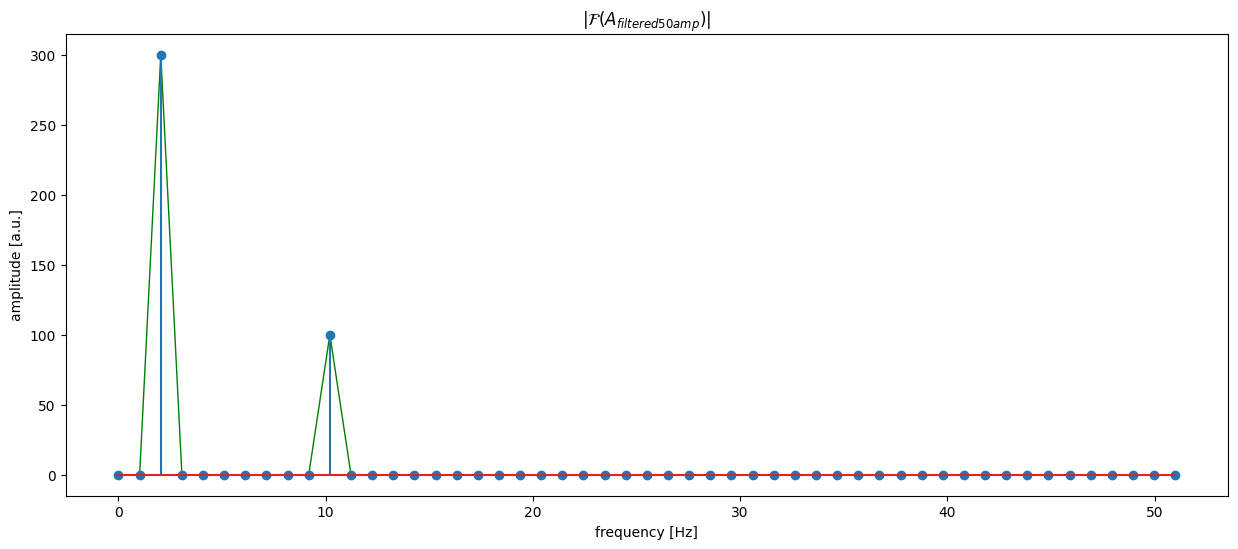

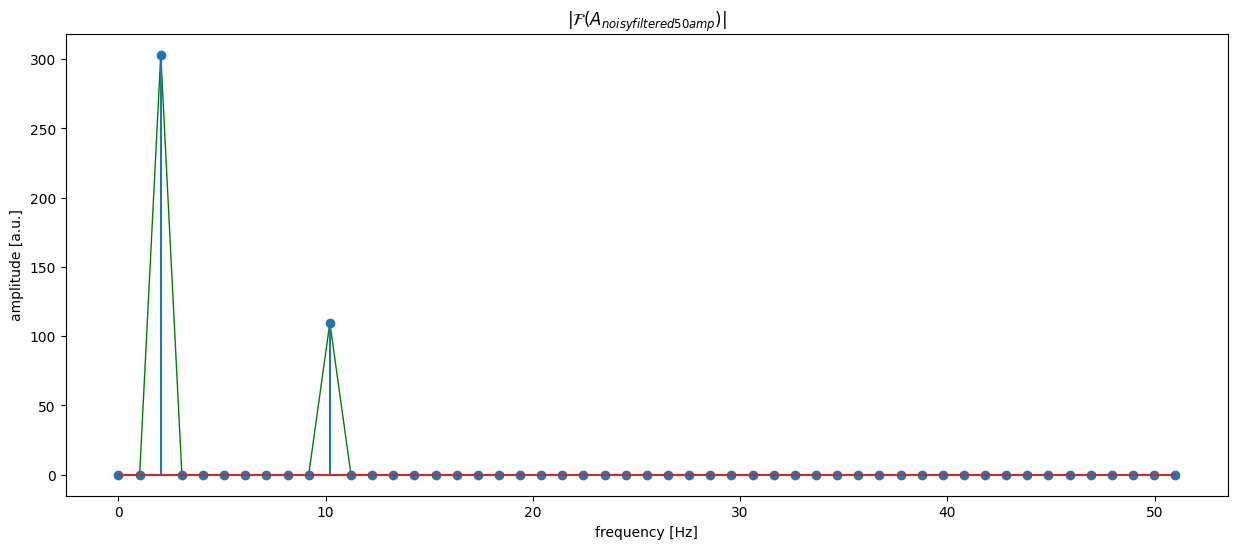

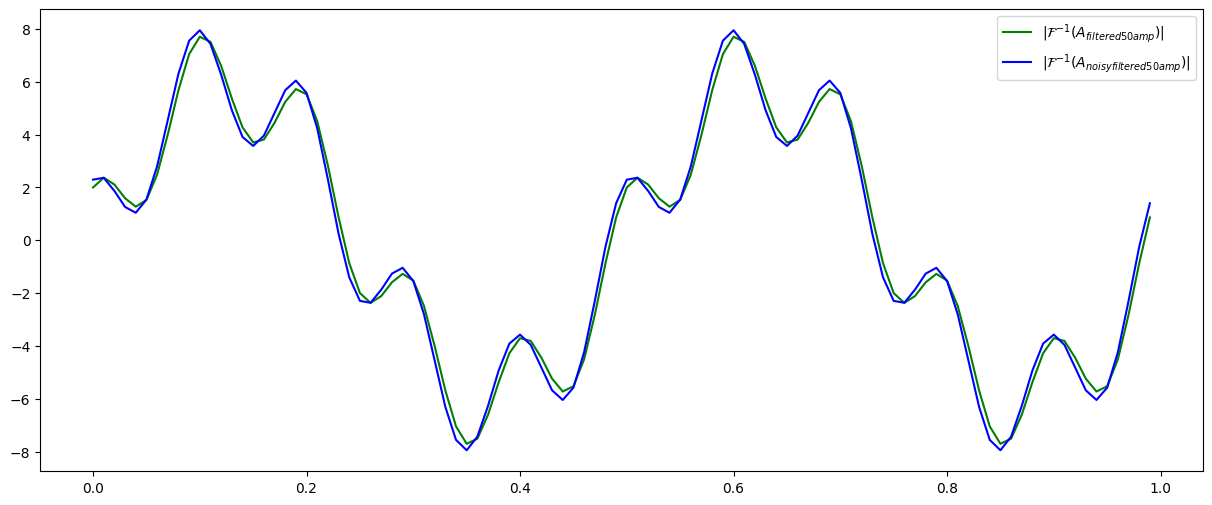

In [11]:
# Your solution 4.3 here:
def amplitude_filter(signal, min_ampl_acc, frequency_eval_max):
  signal_rfft = scipy.fft.rfft(signal, n=frequency_eval_max)
  n = np.shape(signal_rfft)[0]
  freq_rel = n*Fs/frequency_eval_max * np.linspace(0,1,int(n))

  signal_filtered_rfft = signal_rfft.copy()
  for i in range(len(signal_filtered_rfft)):
    if(np.abs(signal_filtered_rfft[i]) < min_ampl_acc):
      signal_filtered_rfft[i] = 0
  
  signal_filtered = scipy.fft.irfft(signal_filtered_rfft)

  return signal_filtered, signal_filtered_rfft, signal_rfft, freq_rel


frequency_eval_max = 100
min_amplitude = 50


# A_signal filtering amplitude < 50
# s = signal
# n = noisy
# f = filtered
_43_s_f, _43_s_f_rfft, _43_s_rfft, _43_freq_rel = amplitude_filter(A_signal, min_amplitude, frequency_eval_max)
fig = plt.figure(17, figsize=(15,6))
plt.clf()
plt.plot(_43_freq_rel, np.abs(_43_s_f_rfft), lw=1.0, c="green")
plt.stem(_43_freq_rel, np.abs(_43_s_f_rfft))
plt.xlabel("frequency [Hz]")
plt.ylabel("amplitude [a.u.]")
plt.title(r"$|\mathcal{F}(A_{filtered 50 amp})|$")
plt.show()

# A_signal_noisy filtering amplitude < 50
# s = signal
# n = noisy
# f = filtered
_43_s_n_f, _43_s_n_f_rfft, _43_s_n_rfft, _43_freq_n_rel = amplitude_filter(A_signal_noisy, min_amplitude, frequency_eval_max)
fig = plt.figure(18, figsize=(15,6))
plt.clf()
plt.plot(_43_freq_n_rel, np.abs(_43_s_n_f_rfft), lw=1.0, c="green")
plt.stem(_43_freq_n_rel, np.abs(_43_s_n_f_rfft))
plt.xlabel("frequency [Hz]")
plt.ylabel("amplitude [a.u.]")
plt.title(r"$|\mathcal{F}(A_{noisy filtered 50 amp})|$")
plt.show()


fig = plt.figure(19, figsize=(15,6))
plt.clf()
plt.plot(t, _43_s_f, c="g", label="$|\mathcal{F}^{-1}(A_{filtered 50 amp})|$")
plt.plot(t, _43_s_n_f, c="blue", label="$|\mathcal{F}^{-1}(A_{noisy filtered 50 amp})|$")
plt.legend()

<details>
<summary><strong>Toggle solution</strong></summary>

~~~python
# Solution 4.3:
def amplitude_filter(signal, A_pass_limit, frequency_eval_max):
    signal_rfft = scipy.fft.rfft(signal, n=frequency_eval_max)
    n = np.shape(signal_rfft)[0]
    frequencies_rel = n * Fs / frequency_eval_max * np.linspace(0, 1, int(n))
    signal_rfft_filtered = signal_rfft.copy()
    signal_rfft_filtered[np.abs(signal_rfft_filtered)<A_pass_limit]=0
    signal_filtered = scipy.fft.irfft(signal_rfft_filtered)
    return signal_filtered, signal_rfft_filtered, signal_rfft, frequencies_rel

A_pass_limit = 50
frequency_eval_max = 100
Current_signal = A_signal_noisy
Current_signal_filtered, Current_signal_rfft_filtered, Current_signal_rfft, frequencies_rel = \
    amplitude_filter(signal=Current_signal, A_pass_limit=A_pass_limit, frequency_eval_max=100)

plot_comparison(frequencies_rel, Current_signal_rfft, Current_signal,
                    A_sin, A_cos, A_signal, fignum=1)
~~~
</details>

## Exercise 5: Compbine both filter approaches
So far, we have applied both filter functions separately. In order to, e.g., apply noise reduction and the exclusion of a certain frequency, you can combine both filters by applying them one after the other:

1. Apply the `amplitude_filter` function to the noisy signal `A_noisy_signal` in order to filter out the noise.
2. Re-use the resulting filtered signal and apply the `frequency_filter` function to it (filter for the frequency 2 or 10 Hz).

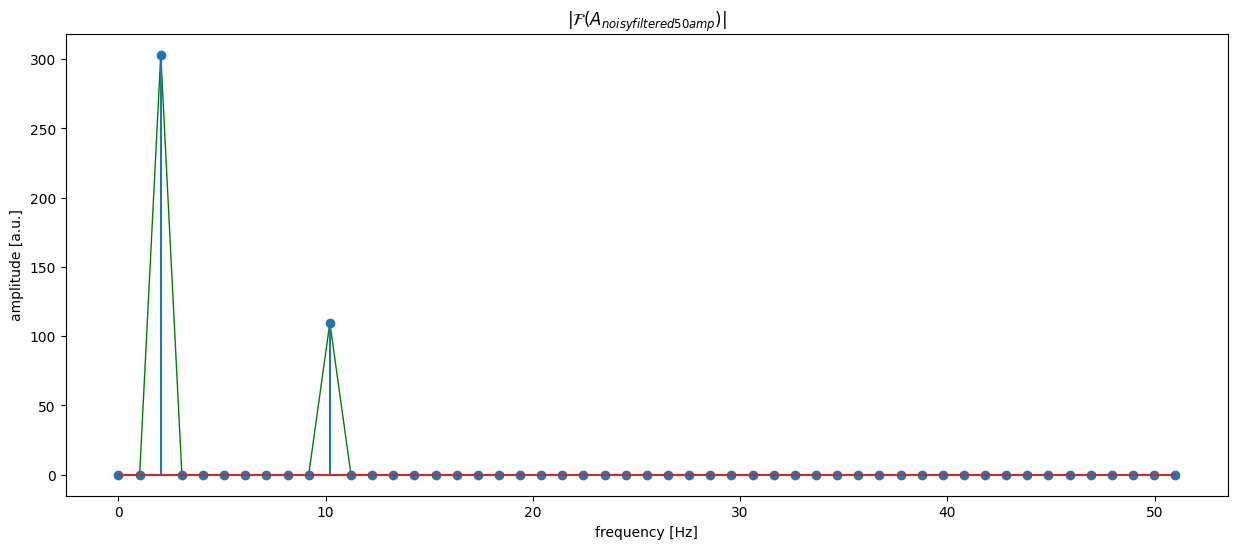

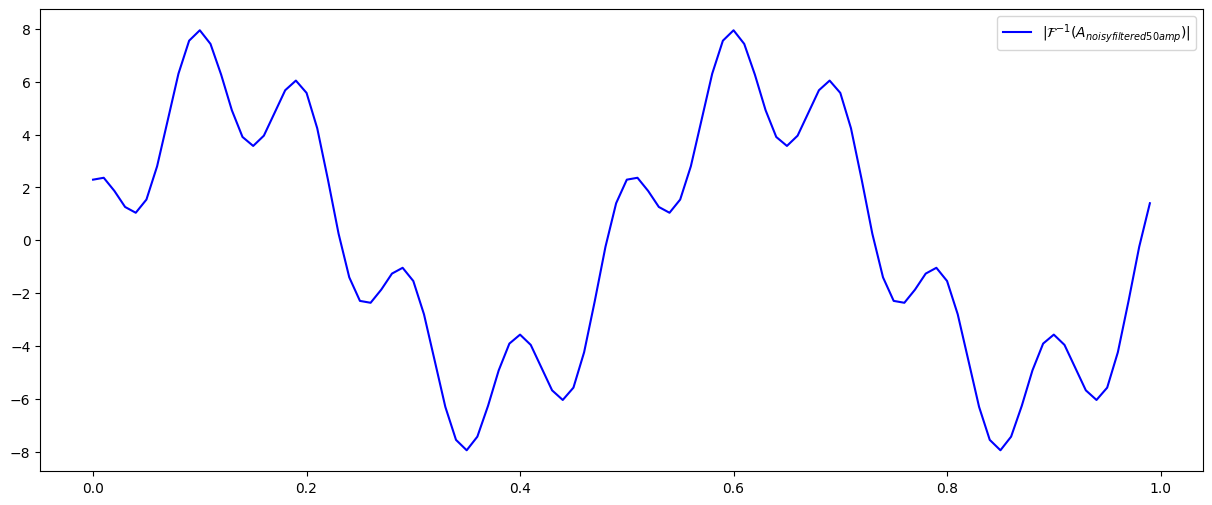

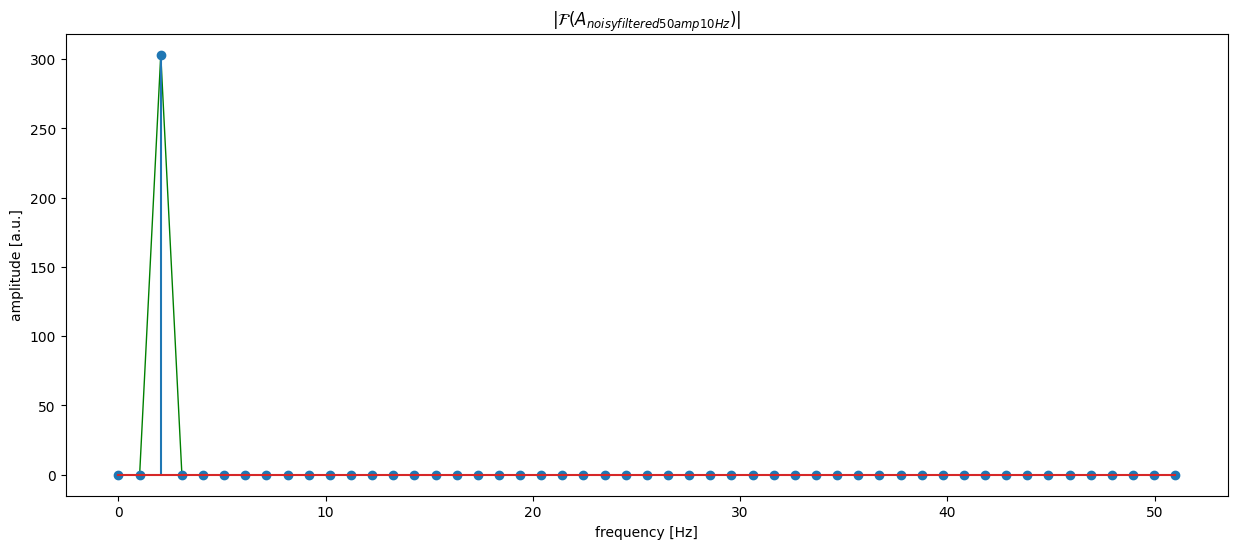

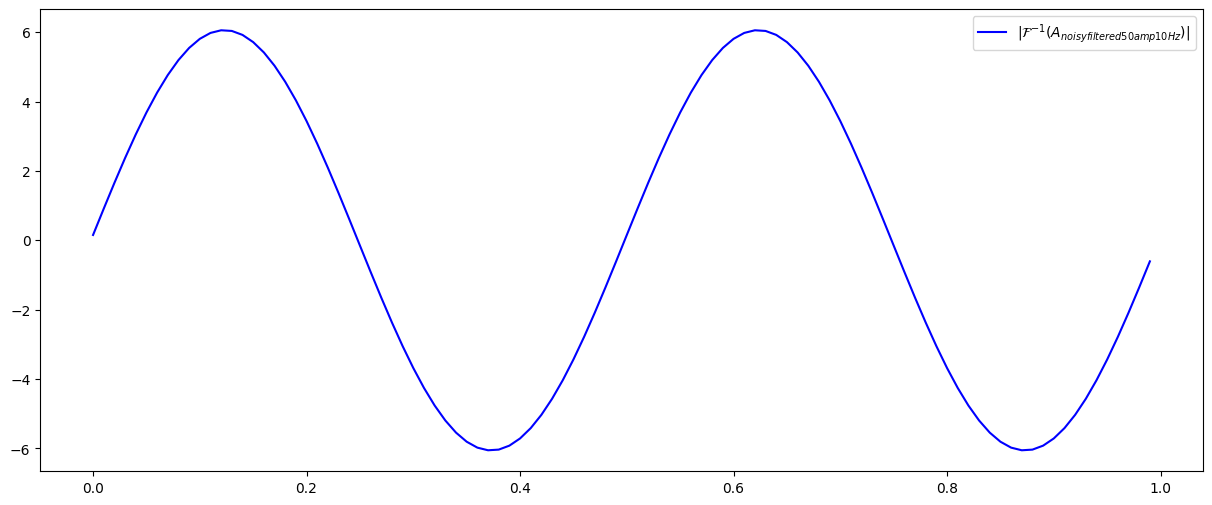

In [12]:
# Your solution 5 here:

frequency_eval_max = 100
min_amplitude = 50

# A_signal_noisy filtering amplitude < 50
# s = signal
# n = noisy
# f = filtered
_5_s_n_f, _5_s_n_f_rfft, _5_s_n_rfft, _5_freq_n_rel = amplitude_filter(A_signal_noisy, min_amplitude, frequency_eval_max)

fig = plt.figure(20, figsize=(15,6))
plt.clf()
plt.plot(_5_freq_n_rel, np.abs(_5_s_n_f_rfft), lw=1.0, c="green")
plt.stem(_5_freq_n_rel, np.abs(_5_s_n_f_rfft))
plt.xlabel("frequency [Hz]")
plt.ylabel("amplitude [a.u.]")
plt.title(r"$|\mathcal{F}(A_{noisy filtered 50 amp})|$")
plt.show()

fig = plt.figure(21, figsize=(15,6))
plt.clf()
plt.plot(t, _5_s_n_f, c="blue", label="$|\mathcal{F}^{-1}(A_{noisy filtered 50 amp})|$")
plt.legend()

_5_s_n_f, _5_s_n_f_rfft, _5_s_n_rfft, _5_freq_n_rel = frequency_filter(_5_s_n_f, 10, frequency_eval_max)

fig = plt.figure(20, figsize=(15,6))
plt.clf()
plt.plot(_5_freq_n_rel, np.abs(_5_s_n_f_rfft), lw=1.0, c="green")
plt.stem(_5_freq_n_rel, np.abs(_5_s_n_f_rfft))
plt.xlabel("frequency [Hz]")
plt.ylabel("amplitude [a.u.]")
plt.title(r"$|\mathcal{F}(A_{noisy filtered 50 amp 10Hz})|$")
plt.show()

fig = plt.figure(21, figsize=(15,6))
plt.clf()
plt.plot(t, _5_s_n_f, c="blue", label="$|\mathcal{F}^{-1}(A_{noisy filtered 50 amp 10 Hz})|$")
plt.legend()

<details>
<summary><strong>Toggle solution</strong></summary>

~~~python
# Solution 5: 
A_pass_limit = 50
frequency_eval_max = 100
Current_signal = A_signal_noisy
Current_signal_filtered, Current_signal_rfft_filtered, Current_signal_rfft, frequencies_rel = \
    amplitude_filter(signal=Current_signal, A_pass_limit=A_pass_limit, frequency_eval_max=100)


filter_frequency = 10
frequency_eval_max = 100
Current_signal = Current_signal_filtered
Current_signal_filtered, Current_signal_rfft_filtered, Current_signal_rfft, frequencies_rel = \
    frequency_filter(signal=Current_signal, filter_frequency=filter_frequency, frequency_eval_max=100)

plot_comparison(frequencies_rel, Current_signal_rfft, Current_signal,
                    A_sin, A_cos, A_signal, fignum=2)
~~~
</details>

## Exercise 6: Application to real world data
Now, we apply our two filter functions to the data from the _Patch Clamp Analysis_ chapter:

1. Recap the [_Analyzing patch clamp recordings_](https://github.com/FabrizioMusacchio/Python_Neuro_Practical/blob/master/04%20Analyzing%20patch%20clamp%20recordings.ipynb) chapter and write a script, that reads the _IGOR_ file `ad1_12.ibw` (lies within the `/Data1` folder).
2. Apply a Fast Fourier Transform in order to assess the prominent frequencies and potential noise within the recording. What is the frequency of the most dominant signal within the recording?
3. Apply your filter functions to filter out any available noise and any unwanted frequency.
4. Again, recap the [_Analyzing patch clamp recordings_](https://github.com/FabrizioMusacchio/Python_Neuro_Practical/blob/master/04%20Analyzing%20patch%20clamp%20recordings.ipynb) chapter and add a section to your script, in which you assess the prominent peaks within the recording by applying the `find_peaks` function from the `scipy` package. From these results, estimate the frequency of the dominant signal within the recording. Discuss differences (if any) between the detected peak frequency from this method and from the Fourier Analysis in 2.

In [13]:
# Your solution 6 here:
!pip install igor 
!pip install neo

from neo import io

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:

test_igor_read = io.IgorIO("ad1_12.ibw").read_analogsignal()

In [15]:
test_igor_read

AnalogSignal with 1 channels of length 80000; units dimensionless; datatype float32 
name: 'ad1_12'
annotations: {'note': b'WAVETYPE=adc\rTIME=12:47:59\rComments=\rTemperature=0\rBASELINE=-70.542698\rBASESUBTRACTED=0.000000\rREJECT=0.000000\rSTEP=0.000000',
  'igor_path': ''}
sampling rate: 100.0 1/s
time: 0.0 s to 800.0 s

In [16]:
test_igor_read.shape

(80000, 1)

In [17]:
test_igor_read.sampling_rate

array(100.) * 1/s

In [18]:
np.array(test_igor_read.sampling_rate) # 1/s

array(100.)

In [19]:
test_igor_read.times

array([0.0000e+00, 1.0000e-02, 2.0000e-02, ..., 7.9997e+02, 7.9998e+02,
       7.9999e+02]) * s

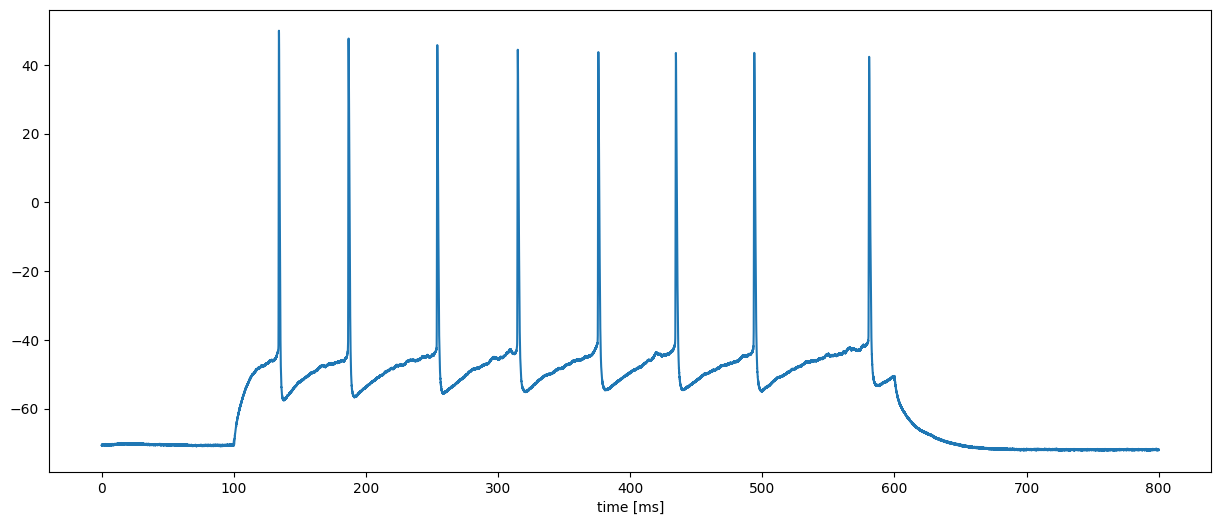

In [20]:
fig = plt.figure(25, figsize=(15,6))
plt.plot(test_igor_read.times, test_igor_read, label="ad1_12")
plt.xlabel("time [ms]")
plt.show()

Text(0.5, 1.0, '$|\\mathcal{F}(signal)|$')

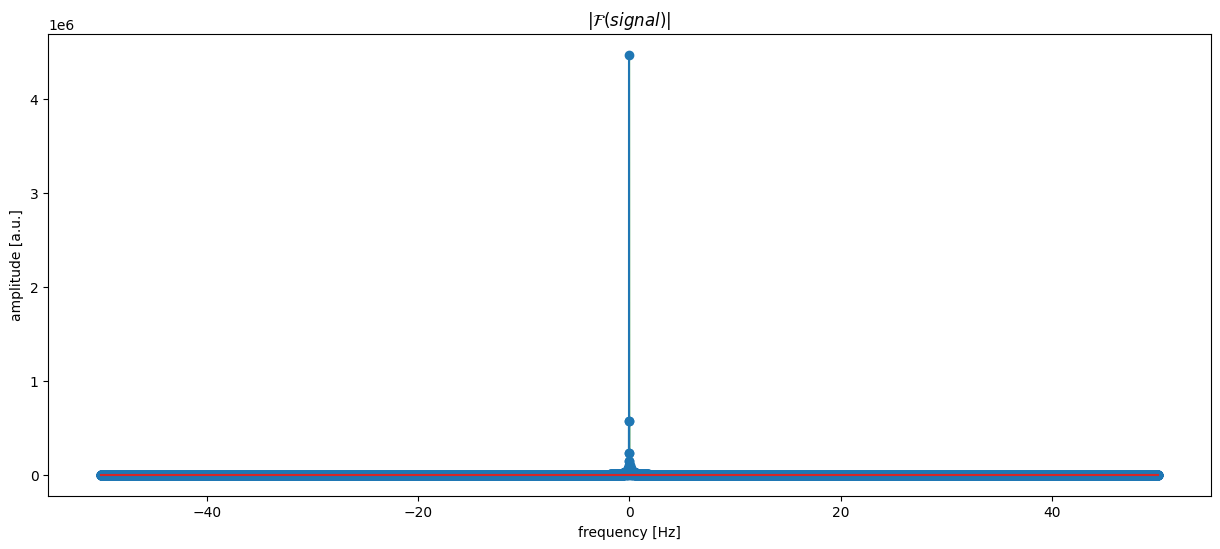

In [28]:
## Step by step
igor_fft = scipy.fft.fft(test_igor_read.flatten())
igor_freq = scipy.fft.fftfreq(np.size(test_igor_read.times), 1/test_igor_read.sampling_rate)

fig=plt.figure(26, figsize=(15,6))
plt.clf()
plt.plot(igor_freq, np.abs(igor_fft), lw=1.0, c='green')
plt.stem(igor_freq, np.abs(igor_fft))
plt.xlabel("frequency [Hz]")
plt.ylabel("amplitude [a.u.]")
plt.title(r"$|\mathcal{F}(signal)|$")

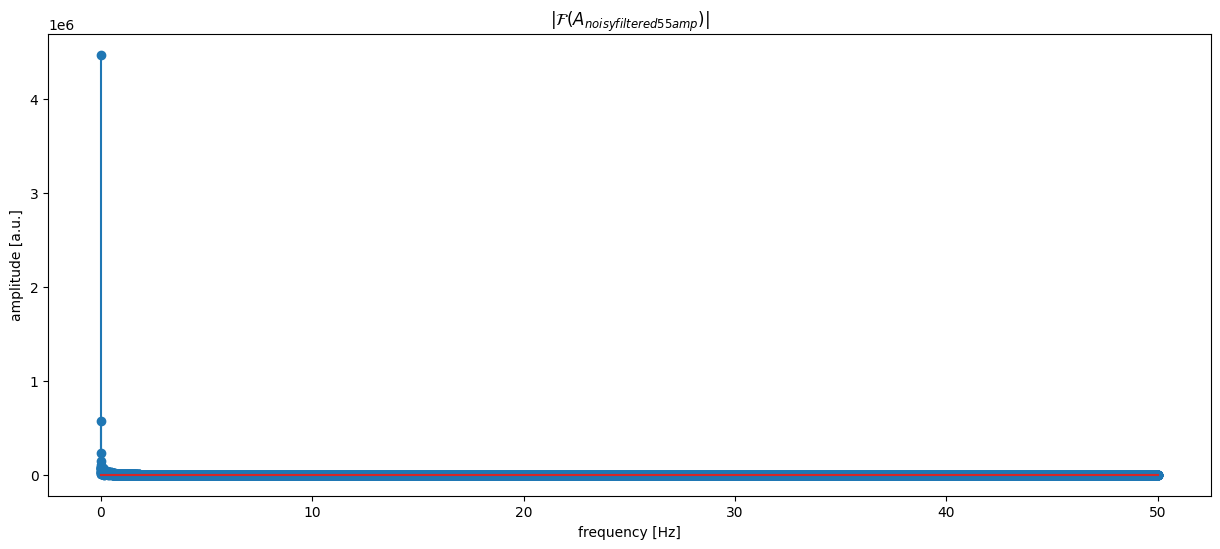

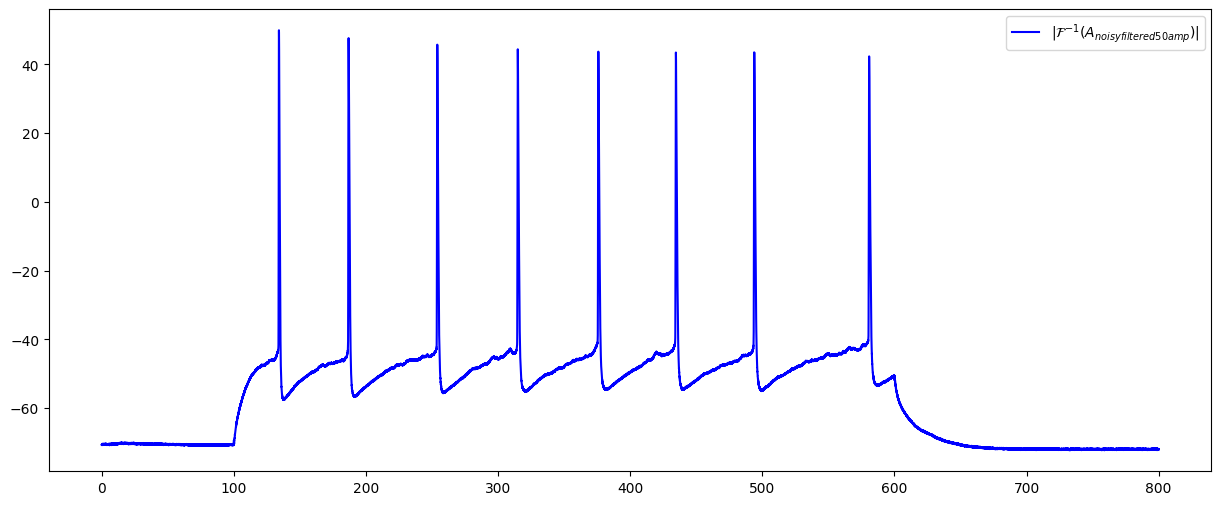

In [22]:
## By func

frequency_eval_max = 80000
min_amplitude = 0
# s = signal
# f = filtered
_igor_s_f, _igor_s_f_rfft, _igor_s_rfft, _igor_freq_rel = amplitude_filter(test_igor_read.flatten(), min_amplitude, frequency_eval_max)
#_igor_s_f, _igor_s_f_rfft, _igor_s_rfft, _igor_freq_rel = frequency_filter(test_igor_read.flatten(), 1, frequency_eval_max)

fig = plt.figure(20, figsize=(15,6))
plt.clf()
plt.plot(_igor_freq_rel, np.abs(_igor_s_f_rfft), lw=1.0, c="green")
plt.stem(_igor_freq_rel, np.abs(_igor_s_f_rfft))
plt.xlabel("frequency [Hz]")
plt.ylabel("amplitude [a.u.]")
plt.title(r"$|\mathcal{F}(A_{noisy filtered 55 amp})|$")
plt.show()

fig = plt.figure(21, figsize=(15,6))
plt.clf()
plt.plot(test_igor_read.times, _igor_s_f, c="blue", label="$|\mathcal{F}^{-1}(A_{noisy filtered 50 amp})|$")
plt.legend()


[13408 18682 25394 31485 31487 37587 43456 49390 49392 58083 58086]


Text(0.5, 1.0, '$|\\mathcal{F}(signal)|$')

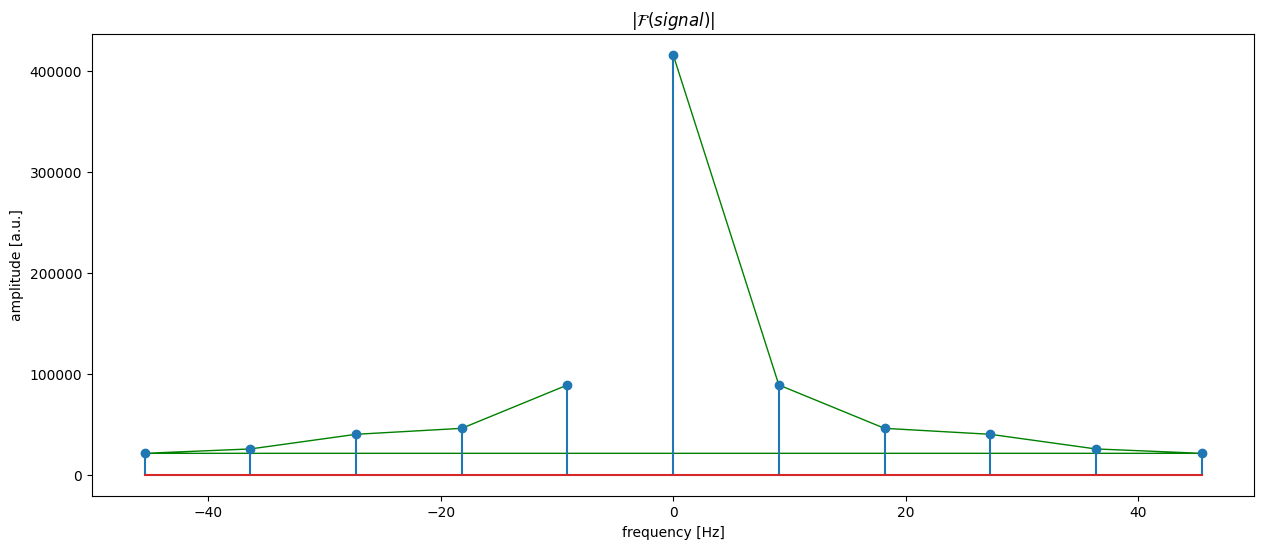

In [36]:
from scipy.signal import find_peaks

peaks, _ = find_peaks(test_igor_read.flatten(), height=-20)
print(peaks)

peaks_fft = scipy.fft.fft(peaks)
peaks_freq = scipy.fft.fftfreq(np.size(peaks), 1/test_igor_read.sampling_rate)


fig=plt.figure(30, figsize=(15,6))
plt.clf()
plt.plot(peaks_freq, np.abs(peaks_fft), lw=1.0, c='green')
plt.stem(peaks_freq, np.abs(peaks_fft))
plt.xlabel("frequency [Hz]")
plt.ylabel("amplitude [a.u.]")
plt.title(r"$|\mathcal{F}(signal)|$")

### Al analizar la señal en el dominio de las frecuencias, tomando todo el conjunto de lecturas y tomando solo los picos ofrecen resultados similares en general, pero cuando se toman todas las lecturas, se toma en cuenta el ruido, lo que genera un espectro de frequencias mucho más grande.

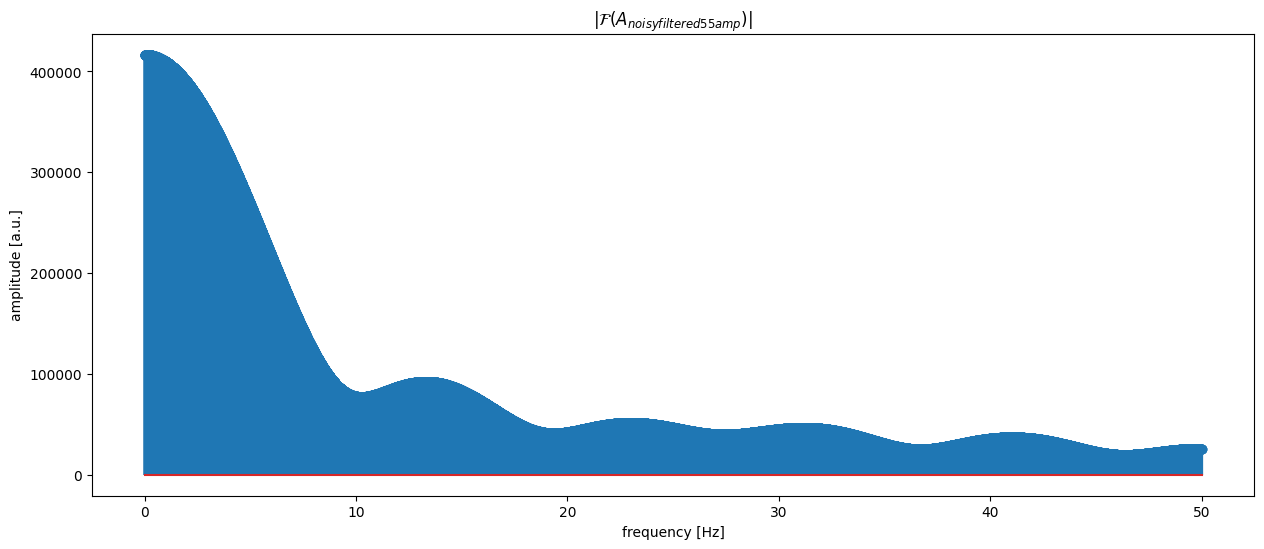

In [43]:
min_amplitude = 50
frequency_eval_max = 80000

_peak_s_f, _peak_s_f_rfft, _peak_s_rfft, _peak_freq_rel = amplitude_filter(peaks, min_amplitude, frequency_eval_max)

fig = plt.figure(20, figsize=(15,6))
plt.clf()
plt.plot(_peak_freq_rel, np.abs(_peak_s_f_rfft), lw=1.0, c="green")
plt.stem(_peak_freq_rel, np.abs(_peak_s_f_rfft))
plt.xlabel("frequency [Hz]")
plt.ylabel("amplitude [a.u.]")
plt.title(r"$|\mathcal{F}(A_{noisy filtered 55 amp})|$")
plt.show()


